In [254]:
import sys
sys.path.append("../sturdystats/")
from api import Index

import requests

api_key = "wowsa"
BASE = "https://sturdystatistics.com/api/text/v1/index"
NAME = "hacker_news_comments_v3"

def get(url, params):
    res = requests.get(BASE + url , params={"api_key": api_key, **params})
    return res

index = Index(API_key="wowsa", name="hacker_news_comments_v3")

def get_docs(params):
    return get(f"/{index.id}/doc", params)

def get_topic_diff(params):
    return get(f"/{index.id}/topic/diff", params)


Found an existing index with id="index_3e7c35cdc5f64ab487aa810d15e5902c".


### Make a very basic Search Query

In [320]:
res = get_docs(dict(query="reddit", summarize_by="sentence")).json()

docs, topics, topic_groups = res["docs"], res["topics"], res["topic_groups"]

### Simple Return: a list of documents that match the query

In [321]:
doc = docs[0]

print(doc.keys())
print(doc["metadata"].keys())

dict_keys(['doc_id', 'metadata', 'predictions', 'text', 'topics'])
dict_keys(['doc', 'doc_id', 'folder_id', 'link', 'nu_post_id', 'ordered_doc_index', 'post_id', 'published', 'rowNo', 'score', 'title'])


###  Each Doc has the most relevant sentence extracted

You can choose to extract either the most relevant `sentence, paragraph, or doc` in the `summarize_by` api option

In [322]:
for doc in docs[:5]:
    print("Title:", doc["metadata"]["title"])
    print("Published:", doc["metadata"]["published"])
    print("Content:", doc["text"])
    print("")

Title: Thousands of subreddits pledge to go dark after the Reddit CEO’s recent remarks
Published: 2023-06-10
Content: Recent and related:<p><i>Thousands of subreddits pledge to go dark after the Reddit CEO’s recent remarks</i> - <a href="https:&#x2F;&#x2F;news.ycombinator.com&#x2F;item?id=36277814">https:&#x2F;&#x2F;news.ycombinator.com&#x2F;item?id=36277814</a> - June 2023 (232 comments)<p><i>Reddit bans subreddit detailing how to move to competitor Kbin</i> - <a href="https:&#x2F;&#x2F;news.ycombinator.com&#x2F;item?id=36268458">https:&#x2F;&#x2F;news.ycombinator.com&#x2F;item?id=36268458</a> - June 2023 (188 comments)<p><i>Ask HN: Where are Reddit users migrating amidst the API fee controversy?</i> - <a href="https:&#x2F;&#x2F;news.ycombinator.com&#x2F;item?id=36267206">https:&#x2F;&#x2F;news.ycombinator.com&#x2F;item?id=36267206</a> - June 2023 (15 comments)<p><i>Reddit CEO Spez AMA Overview</i> - <a href="https:&#x2F;&#x2F;news.ycombinator.com&#x2F;item?id=36265027">https:&#x2F;&#

### More Interesting: List of Topics

In [324]:
import pandas as pd

topic_df = pd.DataFrame(topics).dropna()
topic_df.head()

,executive_paragraph_summary,one_sentence_summary,prevalence,short_title,topic_group_id,topic_group_short_title,topic_id
0,The theme explores the impact of Reddit's mode...,The impact of Reddit's moderation policies on ...,0.542452,Reddit Moderation Impact,0,Miscellaneous,378
1,The examples provided touch upon various discu...,The theme explores discussions around contract...,0.243690,Discussion of Contracts and Labor,0,Miscellaneous,195
2,The theme revolves around community engagement...,"The theme focuses on community engagement, sub...",0.070323,Community Engagement on Reddit,0,Miscellaneous,196
3,The theme delves into the implications of rely...,The theme explores the impact of using adverti...,0.012911,Advertising Revenue Model,2,Business Strategies and Models,460
4,The theme delves into various techniques emplo...,The theme explores tactics and strategies used...,0.012879,Web Traffic Manipulation,0,Miscellaneous,147


In [325]:
row = topic_df.iloc[0]
print("Title:", row.short_title)
print("Summary:", row.executive_paragraph_summary)

Title: Reddit Moderation Impact
Summary: The theme explores the impact of Reddit's moderation policies on user interactions and community dynamics, as well as the potential repercussions such as mass protests, migration to alternative platforms, and concerns regarding user privacy and data. Examples include discussions on post moderation, user bans, vote manipulation, and the potential democratization of moderation. Users express discontent with the platform's handling of content and censorship, leading to discussions on migrating to other platforms. The theme also examines the implications of management changes and the lasting effects on online communities and discussions.


### Let's Explore these topics

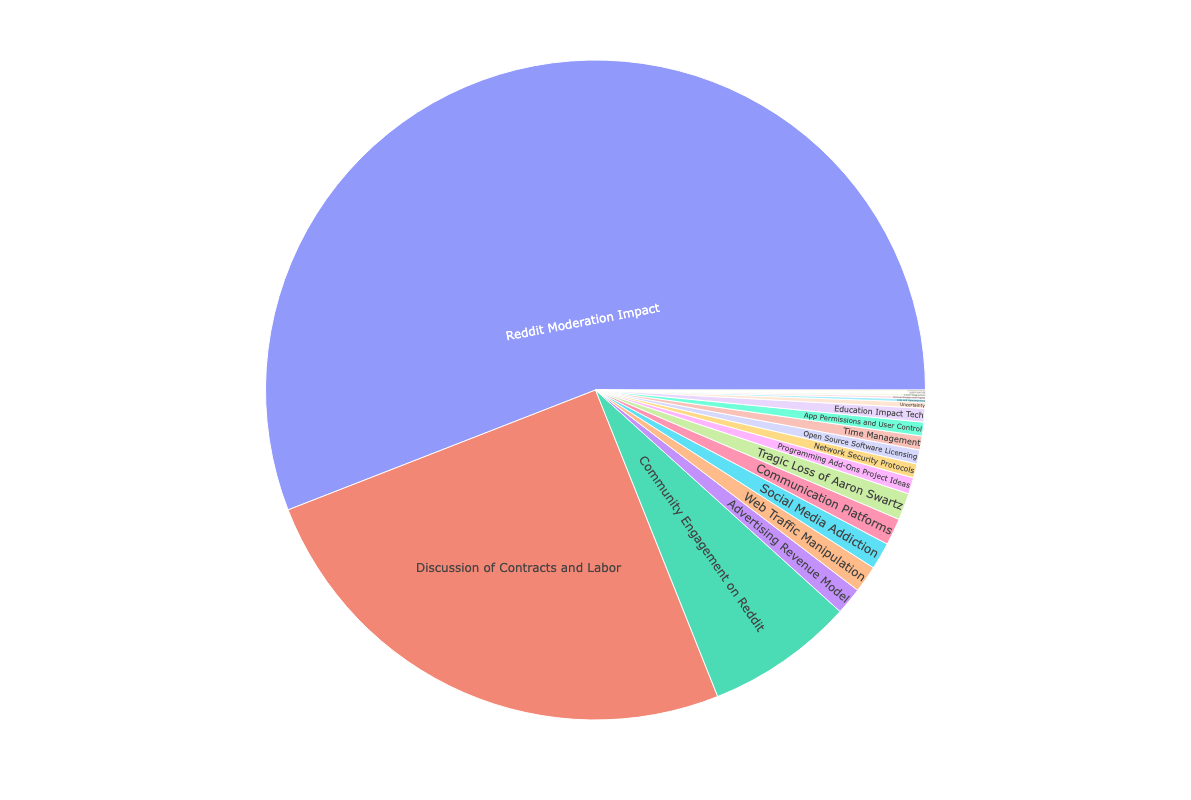

In [326]:
import plotly.express as px
%matplotlib inline

fig = px.sunburst(topic_df.iloc[:20], path=["short_title"], values="prevalence", hover_data=["one_sentence_summary", "topic_id"])
fig.update_layout(width=800, height=800)
fig

### Topics can allow you to explore the dataset without a query

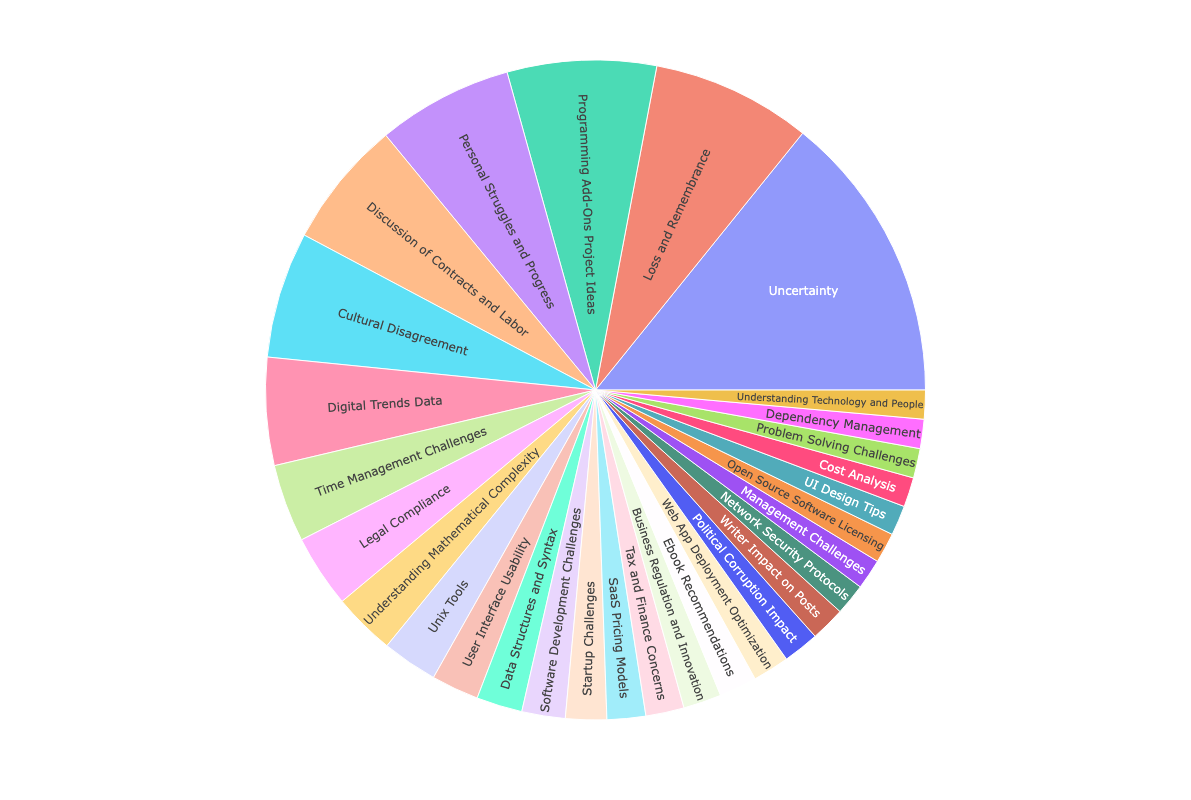

In [126]:
res = get_docs(dict(query="")).json()
docs, topics, topic_groups = res["docs"], res["topics"], res["topic_groups"]
topic_df = pd.DataFrame(topics).dropna()
topic_df.head()
fig = px.sunburst(topic_df.iloc[:30], path=["short_title"], values="prevalence", hover_data=["one_sentence_summary", "topic_id"], )
fig.update_layout(width=800, height=800)
fig

### Topic Groups
Can help you organize these granular topics

In [133]:
group_df = pd.DataFrame(topic_groups)
group_df.head(5)


,executive_paragraph_summary,one_sentence_summary,prevalence,short_title,topic_group_id
0,The topic of Miscellaneous on Tech covers a wi...,Various miscellaneous topics in technology ran...,0.711338,Miscellaneous,0
1,This topic delves into a wide array of themes ...,Exploration of various tech industry topics in...,0.057898,Other,1
2,The recurring topic of Communication and Socie...,The topic explores the dynamics of communicati...,0.041040,Communication and Society,3
3,The topic delves into a range of legal and eth...,Exploration of legal and ethical challenges re...,0.023136,Legal and Ethical Issues,14
4,The topic of Work & Productivity Trends delves...,The topic explores trends in remote software d...,0.020094,Work and Productivity,8


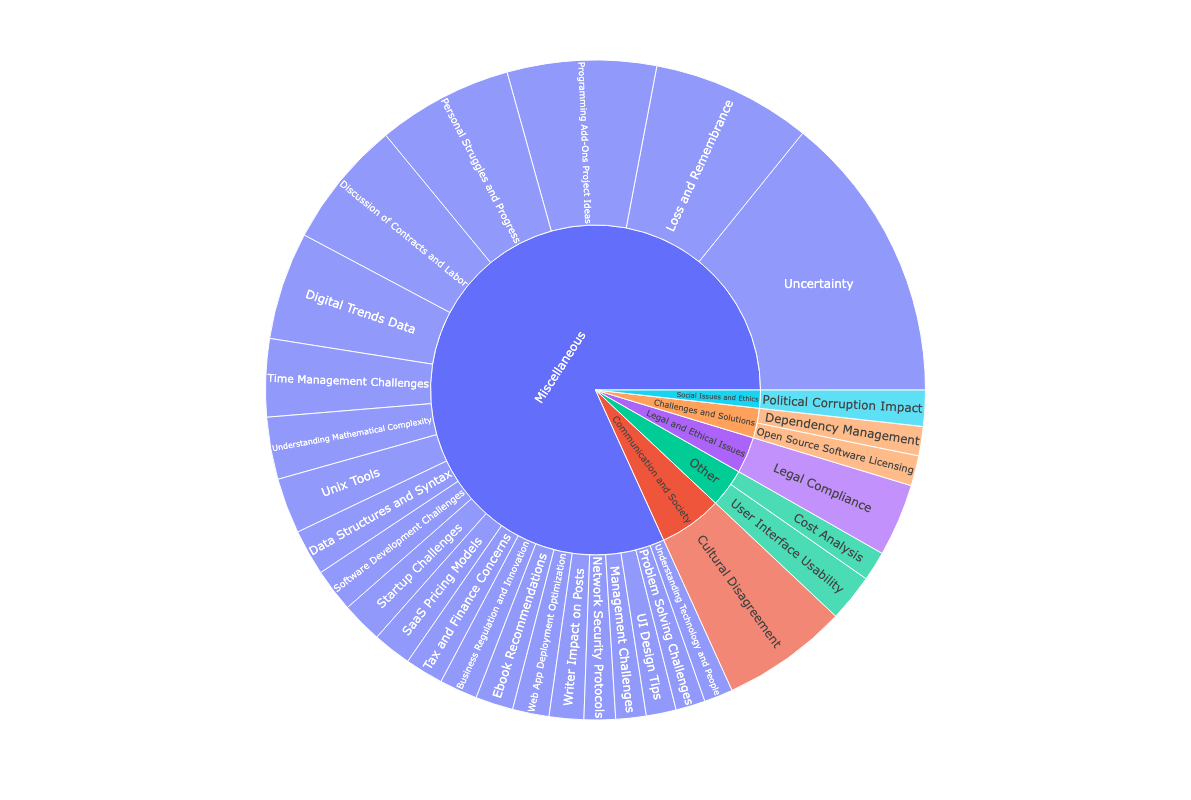

In [135]:
fig = px.sunburst(topic_df.iloc[:30], path=["topic_group_short_title", "short_title"], values="prevalence", hover_data=["one_sentence_summary", "topic_id"] )
fig.update_layout(width=800, height=800)
fig

# You can use these topics to pull up examples!

In [171]:
## Pick a topic w

topic_id = 26
res = get_docs(dict(topic_ids=f"{topic_id}", summarize_by="sentence")).json()

docs = res["docs"]
topic_df = pd.DataFrame(res["topics"]).dropna()
info = topic_df.loc[topic_df.topic_id == topic_id]
print("Topic:", info.short_title.values[0])
print("")

for doc in docs[:5]:
    print("Title:", doc["metadata"]["title"])
    print("Published:", doc["metadata"]["published"])
    print("Link", doc["metadata"]["link"])
    print("Content:", doc["text"])
    print("")

Topic: Cultural Disagreement

Title: Announcing the GNU Kind Communication Guidelines
Published: 2018-10-22
Link https://news.ycombinator.com/item?id=18274663
Content: It is because in practice these are politically motivated trojan horses meant to tear down things like a meritocracy, the very thing that created this great software.<p>I&#x27;ve personally watched the activists pushing these target women and other under-represented minorities using these documents for the crime of disagreeing with the narrative.<p>IE:  <a href="https:&#x2F;&#x2F;medium.com&#x2F;@marlene.jaeckel&#x2F;the-empress-has-no-clothes-the-dark-underbelly-of-women-who-code-and-google-women-techmakers-723be27a45df" rel="nofollow">https:&#x2F;&#x2F;medium.com&#x2F;@marlene.jaeckel&#x2F;the-empress-has-no-cloth...</a><p>I fully expect to see purges happen of talented individuals based on politically motivated targeting etc. with secret tribunals where the accused are guilty until proven innocent etc.. It&#x27;s happ

### You can also run semantic analysis with SQL

In [249]:
res = get_topic_diff(dict(q1=" search('openai') ", )).json()
df = pd.DataFrame(res["topics"]).dropna()
df.head(5)

,confidence,executive_paragraph_summary,one_sentence_summary,prevalence,prevalence_ratio,short_title,topic_group_id,topic_group_short_title,topic_id
0,100,The examples provided highlight the repercussi...,The theme revolves around the impact of AI saf...,0.051041,100.000000,AI Concerns Impacting CEOs,0,Miscellaneous,155
1,100,The theme delves into the complexities of AI c...,This theme explores the capabilities and limit...,0.052770,40.459264,AI Chat Model API,1,Other,471
2,100,The theme revolves around exploring the costs ...,Discussion about the costs and usage of traini...,0.073247,28.214031,AI Training Costs and Usage,1,Other,248
3,100,This theme delves into the evolving landscape ...,"The impact of automation, AI, and advanced tec...",0.017114,21.073963,Automation and AI Impact,7,Technology and Innovation,44
4,100,This theme delves into the idea of artificial ...,The theme explores the concept of artificial i...,0.008412,10.779030,AI Independence,7,Technology and Innovation,73


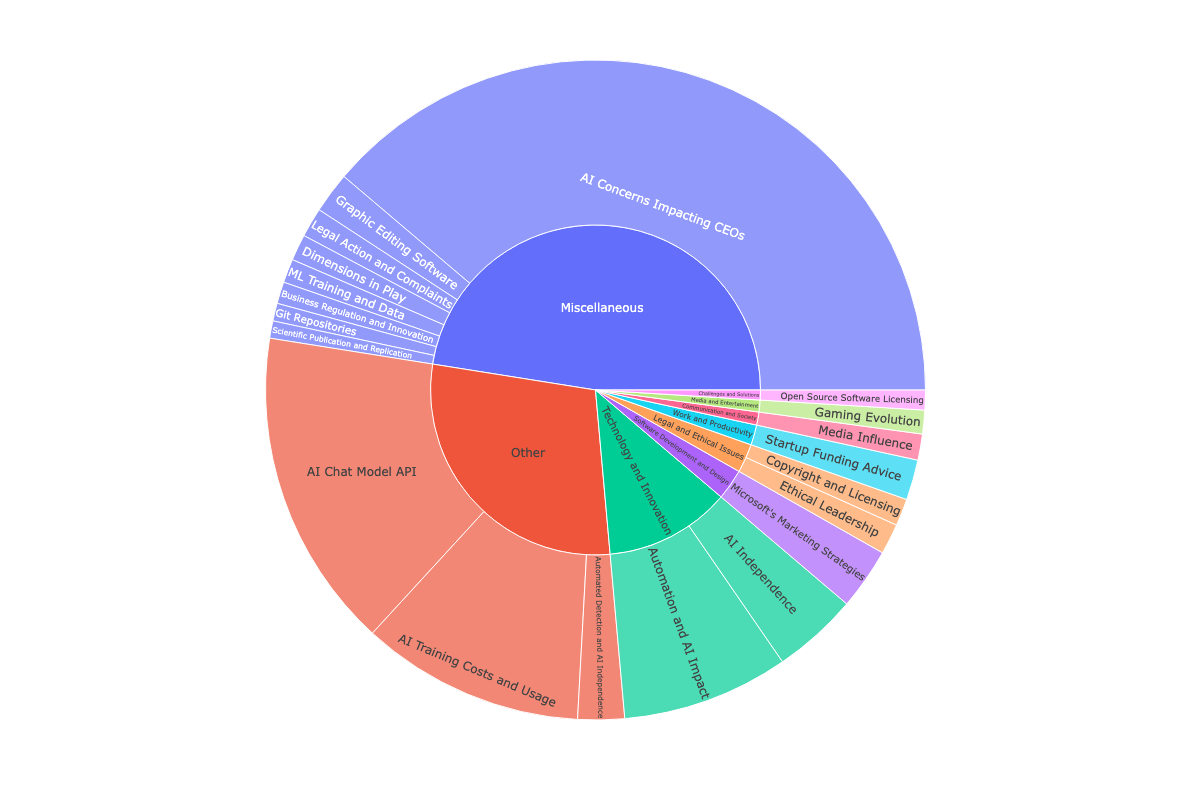

In [251]:
fig = px.sunburst(df.iloc[:30], path=["topic_group_short_title", "short_title"], values="prevalence_ratio", hover_data=["one_sentence_summary", "topic_id"] )
fig.update_layout(width=800, height=800)
fig

### You can chain filters together to refine your analysis

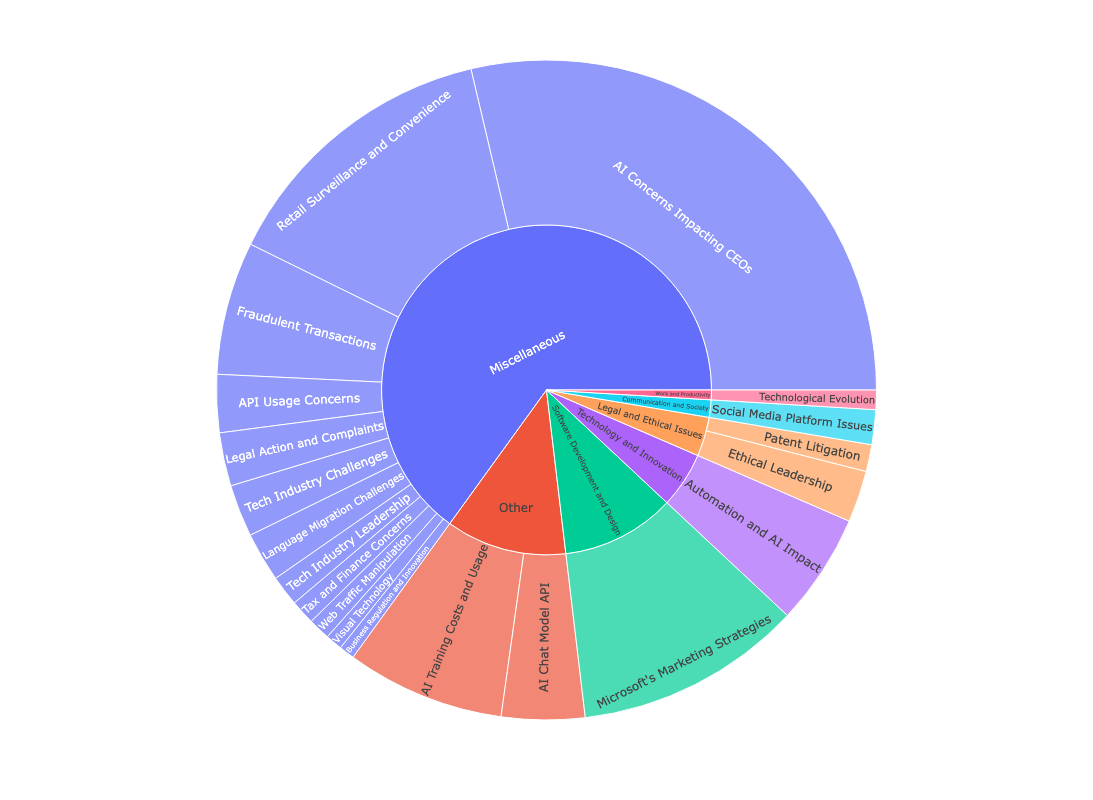

In [255]:
res = get_topic_diff(dict(q1=" search('openai') and published > '2024-01-01' ", )).json()
df = pd.DataFrame(res["topics"]).dropna()
fig = px.sunburst(df.iloc[:30], path=["topic_group_short_title", "short_title"], values="prevalence_ratio", hover_data=["one_sentence_summary", "topic_id"] )
fig.update_layout(width=800, height=800)
fig

### You can even specify the alternative subset to compare outliers

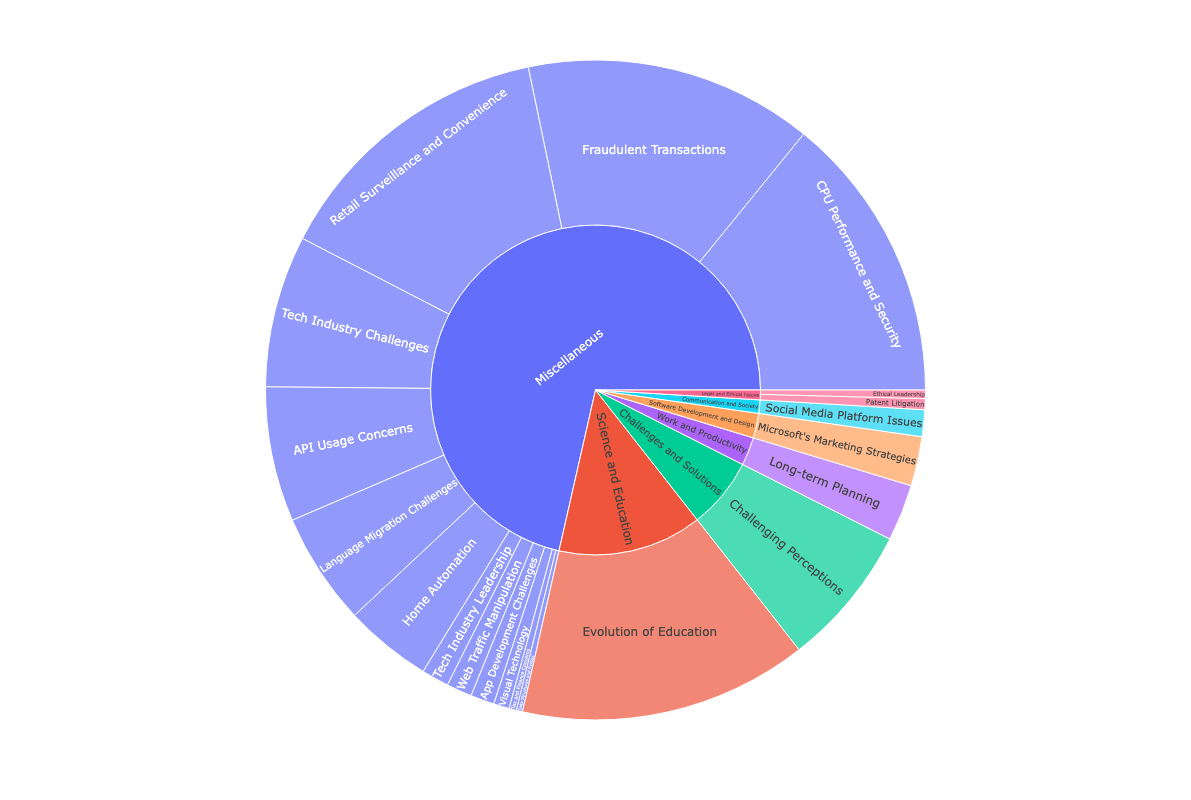

In [348]:
res = get_topic_diff(dict(q1=" search('openai') and published > '2024-01-01' ",
                          q2=" search('openai') and published < '2024-01-01' " )).json()
df = pd.DataFrame(res["topics"]).dropna()
fig = px.sunburst(df.iloc[:30], path=["topic_group_short_title", "short_title"], values="prevalence_ratio", hover_data=["one_sentence_summary", "topic_id"] )
fig.update_layout(width=800, height=800)
fig

## We can even do a time analysis on any topic

In [261]:
buckets = pd.date_range(start="2015-01-01", end="2025-01-01", periods=11)
dfs = []
for i in range(1, len(buckets)):
    start = str(buckets[i-1].date())
    end = str(buckets[i].date())
    query = f"published > '{start}' and published < '{end}'"
    tmp = pd.DataFrame(get_topic_diff(dict(q1=query, cutoff=-1, min_confidence=-1, limit=100000)).json()["topics"]).dropna()
    tmp["time_range"] = start[:4] + "->" + end[:4]
    dfs.append(tmp)

df = pd.concat(dfs)

### You can query docs with the exact same filters to pull up examples

In [347]:
res = get_docs(dict(topic_ids=f"{topic_id}", filters="published>'2024-01-01'", summarize_by="sentence")).json()

docs = res["docs"]
topic_df = pd.DataFrame(res["topics"]).dropna()
info = topic_df.loc[topic_df.topic_id == topic_id]
print("Topic:", info.short_title.values[0])
print("")

for doc in docs[:5]:
    print("Title:", doc["metadata"]["title"])
    print("Published:", doc["metadata"]["published"])
    print("Link", doc["metadata"]["link"])
    print("Content:", doc["text"])
    print("")

Topic: Air Safety Concerns

Title: NTSB says Boeing is withholding key details about door plug on Alaska 737 MAX 9
Published: 2024-03-06
Link https://news.ycombinator.com/item?id=39622787
Content: American companies need to start learning that profit seeking has its limits when it comes to using a single sensor to recalibrate your plane or not installing bolts that make your plan doors fall off mid-flight.<p>In fact, I find it pretty crazy, at all, that the 737 Max, turned out to be just a 737 that had been rehashed to support a much stronger engine via some incredibly complex mechanism of balancing their plane, as if mechanical systems never failed before

Title: FAA orders grounding of more than 170 Boeing 737 Max 9s
Published: 2024-01-06
Link https://news.ycombinator.com/item?id=38893909
Content: &quot;FAA Statement on Temporary Grounding of Certain Boeing 737 MAX 9 Aircraft&quot; - <a href="https:&#x2F;&#x2F;www.faa.gov&#x2F;newsroom&#x2F;faa-statement-temporary-grounding-certain-b

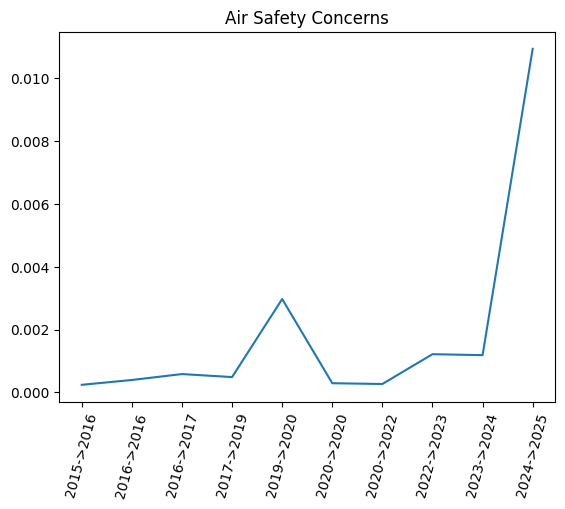

In [346]:
import matplotlib.pyplot as plt
%matplotlib inline

## Pick any topic id to analyze its discussion rate by year!

def viz_timeline(topic_id):
    tmp = df.loc[df.topic_id == topic_id]
    plt.plot(tmp.prevalence.values)
    plt.title(tmp.short_title.iloc[0])
    plt.xticks(range(len(tmp.time_range.values)), labels=tmp.time_range.values, rotation=75)
    return plt.show()

topic_id = 129
viz_timeline(topic_id)